<a href="https://colab.research.google.com/github/lodetomasi/GradientBoostClassifier_Income/blob/master/GradientBoostClassifier_IncomePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix



In [0]:
df = pd.read_csv('census_income_dataset.csv')
df.head(5)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_level
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [0]:
df.describe()   #analisi descrittive


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:20]

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_level      0
dtype: int64

In [0]:
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

In [0]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education']= label_encoder.fit_transform(df['education'])
df['marital_status']= label_encoder.fit_transform(df['marital_status'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['native_country']= label_encoder.fit_transform(df['native_country'])
df['income_level']= label_encoder.fit_transform(df['income_level'])





In [0]:
y = df.income_level
x = df.drop(columns= 'income_level')

In [0]:
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(x)
scaled_df = pd.DataFrame(scaled_df, columns=names)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [0]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.777
Accuracy score (validation): 0.783

Learning rate:  0.1
Accuracy score (training): 0.808
Accuracy score (validation): 0.814

Learning rate:  0.25
Accuracy score (training): 0.848
Accuracy score (validation): 0.852

Learning rate:  0.5
Accuracy score (training): 0.856
Accuracy score (validation): 0.856

Learning rate:  0.75
Accuracy score (training): 0.858
Accuracy score (validation): 0.861

Learning rate:  1
Accuracy score (training): 0.858
Accuracy score (validation): 0.858



In [0]:
y_pred = gb.predict(X_test)
y_pred
accuracy_score(y_test,y_pred)*100 

85.75055278028007

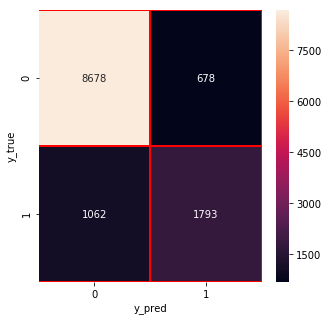

In [0]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

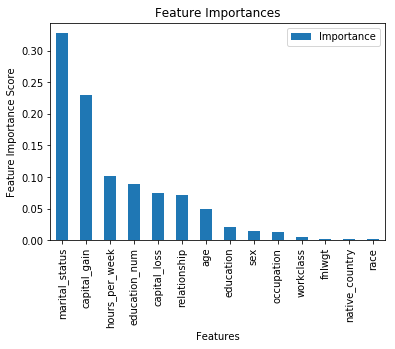

          Features  Importance
5   marital_status    0.328297
10    capital_gain    0.229229
12  hours_per_week    0.101731
4    education_num    0.089455
11    capital_loss    0.074730
7     relationship    0.071400
0              age    0.049428
3        education    0.020237
9              sex    0.014480
6       occupation    0.012148
1        workclass    0.005205
2           fnlwgt    0.001694
13  native_country    0.001027
8             race    0.000939
['marital_status', 'capital_gain', 'hours_per_week', 'education_num', 'capital_loss', 'relationship', 'age', 'education', 'sex', 'occupation', 'workclass', 'fnlwgt', 'native_country', 'race']


In [0]:
feat_imp = gb.feature_importances_
feat = X_train.columns.tolist()
    # clf.best_estimator_.booster().get_fscore()
res_df = pd.DataFrame({'Features': feat, 'Importance': feat_imp}).sort_values(by='Importance', ascending=False)
res_df.plot('Features', 'Importance', kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()
print(res_df)
print(res_df["Features"].tolist())


In [0]:
    print("F1 score is: {}".format(f1_score(y_test, y_pred)))
    print("AUC Score is: {}".format(roc_auc_score(y_test, y_pred)))

F1 score is: 0.6733007885843034
AUC Score is: 0.7777770747898463


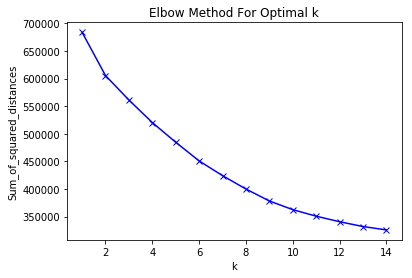

In [0]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
